In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import seaborn as sns
from datetime import datetime

In [88]:
ks = pd.read_csv('ks-projects-201801.csv')

In [102]:
ks


,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378656,999976400,ChknTruk Nationwide Charity Drive 2014 (Canceled),Documentary,Film & Video,USD,2014-10-17,50000.0,2014-09-17 02:35:30,25.0,canceled,1,US,25.0,25.0,50000.00
378657,999977640,The Tribe,Narrative Film,Film & Video,USD,2011-07-19,1500.0,2011-06-22 03:35:14,155.0,failed,5,US,155.0,155.0,1500.00
378658,999986353,Walls of Remedy- New lesbian Romantic Comedy f...,Narrative Film,Film & Video,USD,2010-08-16,15000.0,2010-07-01 19:40:30,20.0,failed,1,US,20.0,20.0,15000.00
378659,999987933,BioDefense Education Kit,Technology,Technology,USD,2016-02-13,15000.0,2016-01-13 18:13:53,200.0,failed,6,US,200.0,200.0,15000.00


In [90]:
tec = ks[ks['main_category'] == 'Technology']

In [91]:
tecl = tec['launched'].astype('datetime64[ns]').dt.date

In [92]:
tecd = tec['deadline'].astype('datetime64[ns]').dt.date

In [65]:
df3 = pd.DataFrame({'backers':tec['backers'],'Duration': (abs(tecd-tecl)).dt.days})

In [112]:
tecsuc = tec[tec['state'] == 'successful']

In [117]:
tecfailed = tec[tec['state'] == 'failed']

In [118]:
tecfailed.describe()

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
count,2.061600e+04,2.061600e+04,20616.000000,20616.000000,20613.000000,20616.000000,2.061600e+04
mean,1.078507e+09,1.416826e+05,2569.018587,20.262418,2019.023997,2408.645695,1.204814e+05
std,6.164366e+08,2.096501e+06,12611.947301,73.535260,11345.570777,12076.553392,1.822021e+06
min,2.137100e+04,1.000000e+00,0.000000,0.000000,0.000000,0.000000,8.300000e-01
25%,5.530568e+08,7.000000e+03,2.000000,1.000000,0.000000,1.637500,6.750278e+03
50%,1.078354e+09,2.000000e+04,100.000000,3.000000,50.000000,98.015000,2.000000e+04
75%,1.610977e+09,5.000000e+04,988.750000,13.000000,623.000000,931.380000,5.000000e+04
max,2.147455e+09,1.000000e+08,721036.460000,3404.000000,721036.460000,721036.460000,1.101698e+08


In [119]:
df4 = pd.DataFrame({'backers': tecfailed['backers'],'Duration': (abs(tecd-tecl)).dt.days})

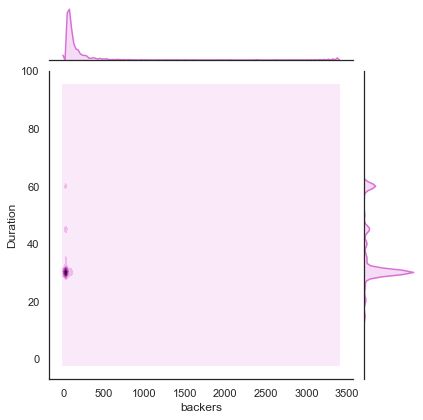

In [124]:
sns.set(style="white")
sns_plot1 = sns.jointplot(data=df4, x='backers', y='Duration', kind='kde', color='orchid' )
sns_plot1.savefig("fail.png")

In [125]:
df5 = pd.DataFrame({'backers': tecsuc['backers'],'Duration': (abs(tecd-tecl)).dt.days})

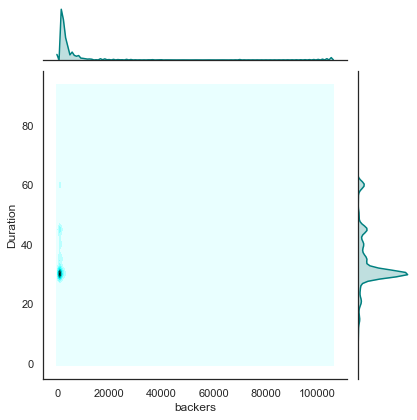

In [127]:
sns_plot2 = sns.jointplot(data=df5, x='backers', y='Duration', kind='kde', color='teal' )
sns_plot2.savefig("success.png")

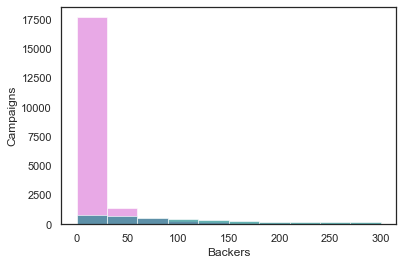

In [162]:
plt.hist([tecfailed['backers']], color='orchid', range=(0,300), alpha=0.6)
plt.hist([tecsuc['backers']], color='teal', range=(0,300), alpha=0.6)
plt.xlabel('Backers')
plt.ylabel('Campaigns')
plt.show()


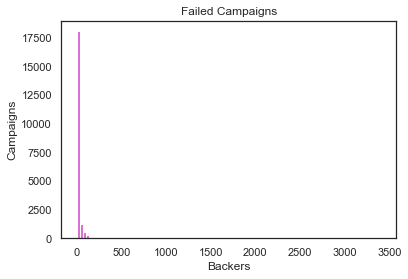

In [170]:
plt.hist([tecfailed['backers']], color='orchid',   bins=100)
plt.xlabel('Backers')
plt.title('Failed Campaigns')

plt.ylabel('Campaigns')
plt.show()

In [ ]:
#explore ones that got more than 100 backers

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
65,1000245024,Safer Home,Hardware,Technology,CAD,2015-07-03,50000.0,2015-06-03 05:52:43,0.0,failed,0,CA,0.00,0.00,39739.31
67,1000256230,Shreddit - Privacy on Reddit,Software,Technology,GBP,2017-07-02,2000.0,2017-06-02 12:20:21,0.0,failed,0,GB,0.00,0.00,2579.35
71,1000261018,Diposta - liberating people from their postal ...,Web,Technology,USD,2016-08-23,100000.0,2016-07-24 13:18:36,141.0,failed,3,US,100.00,141.00,100000.00
98,100039820,Best Spray Bottle Ever - SureShot,Gadgets,Technology,CAD,2015-03-07,25000.0,2015-02-05 16:57:21,3.0,failed,3,CA,2.41,2.36,19632.48
112,1000468345,iRNinja - Control your TV with a simple press ...,Gadgets,Technology,USD,2017-06-14,500.0,2017-05-10 16:00:18,74.0,failed,6,US,261.00,74.00,500.00


In [188]:
tfe = tecfailed[tecfailed['backers'] >= 100]


In [212]:
tfe1 = tfe[tfe['usd_goal_real'] <= 100000]
tfe1.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
1060,1005302689,51st Studios Unplugged: Wood Headphones featur...,Hardware,Technology,USD,2014-05-08,60000.0,2014-04-08 22:09:47,45687.01,failed,108,US,45687.01,45687.01,60000.00
1077,1005397520,REDS.box - Get your privacy back in the cloud,Hardware,Technology,EUR,2016-02-18,50000.0,2016-01-19 12:01:32,33916.00,failed,209,DE,36950.77,37633.01,55479.73
2287,1011855553,The Adventures of Super Stretch-Yoga & Mindful...,Apps,Technology,USD,2017-12-09,50000.0,2017-11-09 17:55:11,9299.00,failed,104,US,51.00,9299.00,50000.00
2642,1013526951,if... Pen,Gadgets,Technology,AUD,2016-07-29,65000.0,2016-06-13 16:00:25,32383.00,failed,227,AU,17774.23,24344.46,48864.83
2691,1013783768,Novlr. Novel writing. Simply.,Software,Technology,GBP,2014-10-07,20000.0,2014-09-16 21:32:36,8873.77,failed,151,GB,14415.25,14228.31,32068.24


In [186]:
df5 = pd.DataFrame({'Backers': tfe['backers'],'Goal': tfe['usd_goal_real']})
df5.head()
print(type(df5['Goal'][1077]))

<class 'numpy.float64'>


In [207]:
df6 = pd.DataFrame({'Backers': tfe1['backers'],'Goal': tfe1['usd_goal_real']})
df6.head()

,Backers,Goal
1060,108,60000.00
1077,209,55479.73
2287,104,50000.00
2642,227,48864.83
2691,151,32068.24


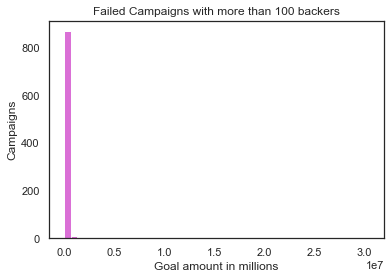

In [194]:
plt.hist([df5['Goal']], color='orchid',   bins=50)
plt.xlabel('Goal amount in millions')
plt.title('Failed Campaigns with more than 100 backers')
plt.ylabel('Campaigns')
plt.show()

In [205]:
df6.describe()

,Backers,Goal
count,880.00000,880.000000
mean,243.88750,87546.080716
std,247.03715,114280.724096
min,100.00000,2000.000000
25%,124.00000,30000.000000
50%,170.50000,50000.000000
75%,270.25000,100000.000000
max,3404.00000,1000000.000000


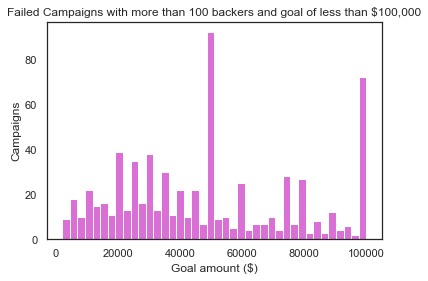

In [211]:
plt.hist([df6['Goal']], color='orchid', bins=40)
plt.xlabel('Goal amount ($)')
plt.title('Failed Campaigns with more than 100 backers and goal of less than $100,000')
plt.ylabel('Campaigns')
plt.show()

In [187]:
#sns_plot4 = sns.jointplot(data=df5, x='Backers', y='Goal', kind='kde', color='orchid' )
#sns_plot1.savefig("fail.png")

In [13]:
#idea success rate vs start month??

plot the length of thing against the number of pledges ?